In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc t

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_tvshows = pd.read_csv(path + 'otttvshows.csv')
 
df_tvshows.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18+   6.9             94%       NaN   
1   2         Philadelphia  1993  13+   8.8             80%       NaN   
2   3                 Roma  2018  18+   8.7             93%       NaN   
3   4                  Amy  2015  18+   7.0             87%       NaN   
4   5  The Young Offenders  2016  NaN   8.0            100%       NaN   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country Language  \
0      Action,Drama,Sci-Fi,Thriller                 United States  English   
1                            Comedy                 United States  English   
2  Action,Drama,History,Romance,War  United Kingdom,United States  English   
3                             Drama                 United States  English   
4                            Comedy        United Kingdom,Ireland  English   

                                            Plotline  Runtime       Kind  \
0  Set seven years after the world has become a f...     60.0  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...     22.0  tv series   
2  In this British historical drama, the turbulen...     52.0  tv series   
3  A family drama focused on three generations of...     60.0  tv series   
4                                                NaN     30.0  tv series   

   Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0      3.0        1     0            0        0     1  
1     18.0        1     0            0        0     1  
2      2.0        1     0            0        0     1  
3      6.0        1     0            1        1     1  
4      3.0        1     0            0        0     1

In [6]:
# profile = ProfileReport(df_tvshows)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  5432
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
**************

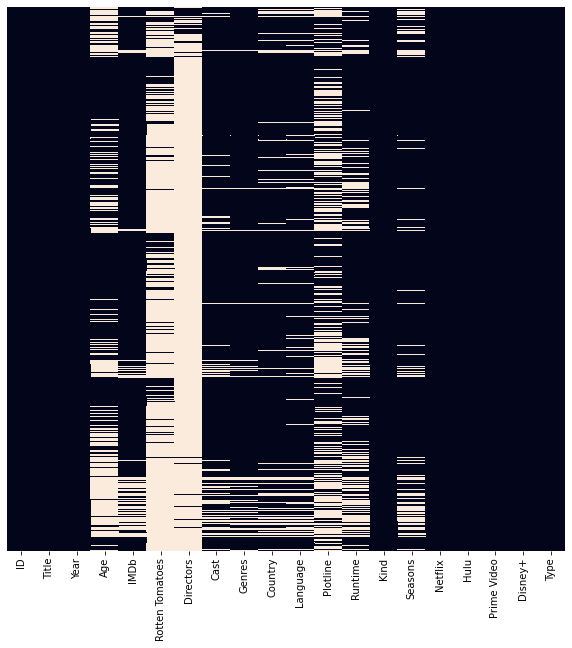

In [8]:
data_investigate(df_tvshows)

In [9]:
# ID
# df_tvshows = df_tvshows.drop(['ID'], axis = 1)
 
# Age
df_tvshows.loc[df_tvshows['Age'].isnull() & df_tvshows['Disney+'] == 1, "Age"] = '13'
# df_tvshows.fillna({'Age' : 18}, inplace = True)
df_tvshows.fillna({'Age' : 'NR'}, inplace = True)
df_tvshows['Age'].replace({'all': '0'}, inplace = True)
df_tvshows['Age'].replace({'7+': '7'}, inplace = True)
df_tvshows['Age'].replace({'13+': '13'}, inplace = True)
df_tvshows['Age'].replace({'16+': '16'}, inplace = True)
df_tvshows['Age'].replace({'18+': '18'}, inplace = True)
# df_tvshows['Age'] = df_tvshows['Age'].astype(int)
 
# IMDb
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].mean()}, inplace = True)
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].median()}, inplace = True)
df_tvshows.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].astype(int)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].mean()}, inplace = True)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].median()}, inplace = True)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'].astype(int)
df_tvshows.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_tvshows = df_tvshows.drop(['Directors'], axis = 1)
df_tvshows.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_tvshows.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_tvshows.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_tvshows.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_tvshows.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_tvshows.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_tvshows.fillna({'Runtime' : df_tvshows['Runtime'].mean()}, inplace = True)
# df_tvshows['Runtime'] = df_tvshows['Runtime'].astype(int)
df_tvshows.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_tvshows.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_tvshows.fillna({'Type': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Type'], axis = 1)
 
# Seasons
# df_tvshows.fillna({'Seasons': 1}, inplace = True)
df_tvshows.fillna({'Seasons': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Seasons'], axis = 1)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
# df_tvshows.fillna({'Seasons' : df_tvshows['Seasons'].mean()}, inplace = True)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
 
# Service Provider
df_tvshows['Service Provider'] = df_tvshows.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_tvshows.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_tvshows.dropna(how = 'any', inplace = True)
df_tvshows.drop_duplicates(inplace = True)

No of Rows :  5432
No of Coloums :  21
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Seasons             object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
S

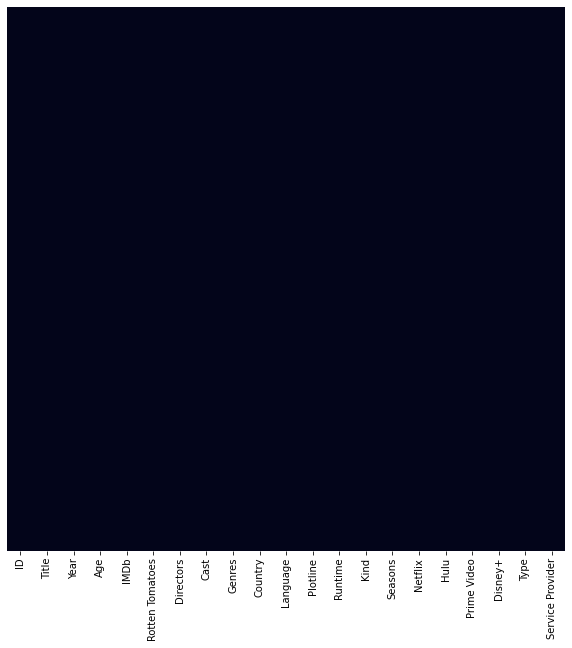

In [10]:
data_investigate(df_tvshows)

In [11]:
df_tvshows.head()

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

                                            Plotline Runtime       Kind  \
0  Set seven years after the world has become a f...      60  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...      22  tv series   
2  In this British historical drama, the turbulen...      52  tv series   
3  A family drama focused on three generations of...      60  tv series   
4                                                 NA      30  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3       1     0            0        0     1           Netflix  
1      18       1     0            0        0     1           Netflix  
2       2       1     0            0        0     1           Netflix  
3       6       1     0            1        1     1           Netflix  
4       3       1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [12]:
df_tvshows.describe()

ID         Year      Netflix         Hulu  Prime Video  \
count  5432.000000  5432.000000  5432.000000  5432.000000  5432.000000   
mean   2716.500000  2010.668446     0.341311     0.293999     0.403351   
std    1568.227662    11.726176     0.474193     0.455633     0.490615   
min       1.000000  1901.000000     0.000000     0.000000     0.000000   
25%    1358.750000  2009.000000     0.000000     0.000000     0.000000   
50%    2716.500000  2014.000000     0.000000     0.000000     0.000000   
75%    4074.250000  2017.000000     1.000000     1.000000     1.000000   
max    5432.000000  2020.000000     1.000000     1.000000     1.000000   

           Disney+    Type  
count  5432.000000  5432.0  
mean      0.033689     1.0  
std       0.180445     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max       1.000000     1.0

In [13]:
df_tvshows.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.031346 -0.646330  0.034293     0.441264  0.195409   
Year        -0.031346  1.000000  0.222316 -0.065807    -0.198675 -0.022741   
Netflix     -0.646330  0.222316  1.000000 -0.366515    -0.515086 -0.119344   
Hulu         0.034293 -0.065807 -0.366515  1.000000    -0.377374 -0.075701   
Prime Video  0.441264 -0.198675 -0.515086 -0.377374     1.000000 -0.151442   
Disney+      0.195409 -0.022741 -0.119344 -0.075701    -0.151442  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_tvshows.sort_values('Year', ascending = True)
# df_tvshows.sort_values('IMDb', ascending = False)

In [15]:
# df_tvshows.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_otttvshows.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_tvshows = pd.read_csv(path + 'updated_otttvshows.csv')
 
# udf_tvshows

In [16]:
# df_netflix_tvshows = df_tvshows.loc[(df_tvshows['Netflix'] > 0)]
# df_hulu_tvshows = df_tvshows.loc[(df_tvshows['Hulu'] > 0)]
# df_prime_video_tvshows = df_tvshows.loc[(df_tvshows['Prime Video'] > 0)]
# df_disney_tvshows = df_tvshows.loc[(df_tvshows['Disney+'] > 0)]

In [17]:
df_netflix_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 1) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_hulu_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 1) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_prime_video_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 1 ) & (df_tvshows['Disney+'] == 0)]
df_disney_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 1)]

In [107]:
df_tvshows_genres = df_tvshows.copy()

In [108]:
df_tvshows_genres.drop(df_tvshows_genres.loc[df_tvshows_genres['Genres'] == "NA"].index, inplace = True)
# df_tvshows_genres = df_tvshows_genres[df_tvshows_genres.Genre != "NA"]
# df_tvshows_genres['Genres'] = df_tvshows_genres['Genres'].astype(str)

In [109]:
df_tvshows_count_genres = df_tvshows_genres.copy()

In [110]:
df_tvshows_genre = df_tvshows_genres.copy()

In [125]:
df_tvshows_genre_all = df_tvshows_genres.copy()

In [22]:
# Create genres dict where key=name and value = number of genres
 
genres = {}
 
for i in df_tvshows_count_genres['Genres'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        genres[i] = len(i.split(','))
    else:
        genres[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_count_genres['Number of Genres'] = df_tvshows_count_genres['Genres'].map(genres).astype(int)

In [23]:
df_tvshows_mixed_genres = df_tvshows_count_genres.copy()

In [24]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_genres_tvshows = df_tvshows_count_genres.loc[df_tvshows_count_genres['Netflix'] == 1]
hulu_genres_tvshows = df_tvshows_count_genres.loc[df_tvshows_count_genres['Hulu'] == 1]
prime_video_genres_tvshows = df_tvshows_count_genres.loc[df_tvshows_count_genres['Prime Video'] == 1]
disney_genres_tvshows = df_tvshows_count_genres.loc[df_tvshows_count_genres['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

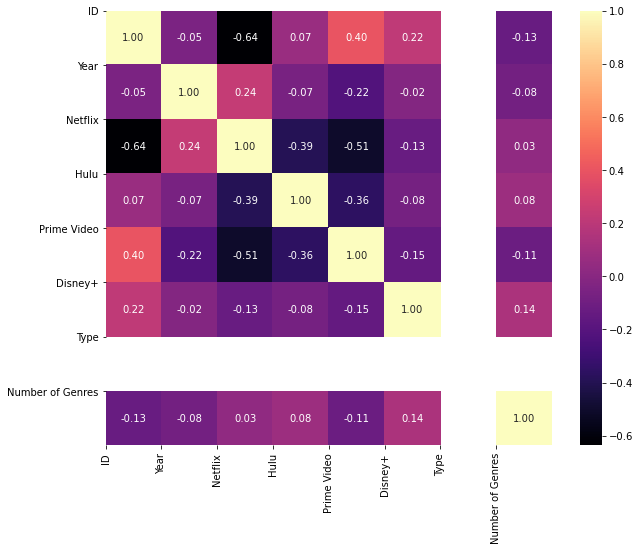

In [25]:
plt.figure(figsize = (10, 10))
corr = df_tvshows_count_genres.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_genres_most_tvshows = df_tvshows_count_genres.sort_values(by = 'Number of Genres', ascending = False).reset_index()
df_genres_most_tvshows = df_genres_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_genres['Number of Genres'] == (df_tvshows_count_genres['Number of Genres'].max()))
# df_genres_most_tvshows = df_tvshows_count_genres[filter]
 
# mostest_rated_tvshows = df_tvshows_count_genres.loc[df_tvshows_count_genres['Number of Genres'].idxmax()]
 
print('\nTV Shows with Highest Ever Number of Genres are : \n')
df_genres_most_tvshows.head(5)


TV Shows with Highest Ever Number of Genres are : 



ID                       Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2406             Steven Universe  2013   7  8.2             100        NA   
1  5314                   Gargoyles  1994   7  8.1              NA        NA   
2  2275               Gravity Falls  2012   7  8.9             100        NA   
3  3896              Infinity Train  2019   7  8.5             100        NA   
4  2096  Spy Kids: Mission Critical  2018   7  4.7              NA        NA   

                                                Cast  \
0  Zach Callison,Deedee Magno,Michaela Dietz,Este...   
1  Keith David,Salli Richardson-Whitfield,Jeff Be...   
2  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
3  Ashley Johnson,Owen Dennis,Jeremy Crutchley,Ki...   
4  Nicholas Coombe,Ashley Bornancin,Carter Hastin...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Drama,Family...   
1  Animation,Action,Adventure,Crime,Drama,Family,...   
2  Animation,Adventure,Comedy,Drama,Family,Fantas...   
3  Animation,Action,Adventure,Drama,Family,Fantas...   
4  Animation,Action,Adventure,Comedy,Drama,Family...   

                                             Country  ... Runtime       Kind  \
0       United States,South Korea,Spain,Japan,Mexico  ...      11  tv series   
1                                      United States  ...      30  tv series   
2  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
3                                      United States  ...      11  tv series   
4                               United States,Canada  ...      NA  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       6       0    1            0        0     1              Hulu   
1       2       0    0            0        1     1           Disney+   
2       2       0    1            0        1     1           Disney+   
3       4       0    0            1        0     1       Prime Video   
4       3       1    0            0        0     1           Netflix   

   Number of Genres  
0                11  
1                10  
2                10  
3                10  
4                 9  

[5 rows x 22 columns]

In [27]:
fig = px.bar(y = df_genres_most_tvshows['Title'][:15],
             x = df_genres_most_tvshows['Number of Genres'][:15], 
             color = df_genres_most_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Highest Number of Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_genres_least_tvshows = df_tvshows_count_genres.sort_values(by = 'Number of Genres', ascending = True).reset_index()
df_genres_least_tvshows = df_genres_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_genres['Number of Genres'] == (df_tvshows_count_genres['Number of Genres'].min()))
# df_genres_least_tvshows = df_tvshows_count_genres[filter]

print('\nTV Shows with Lowest Ever Number of Genres are : \n')
df_genres_least_tvshows.head(5)


TV Shows with Lowest Ever Number of Genres are : 



ID                           Title  Year Age IMDb Rotten Tomatoes  \
0  5431                     Love & Vets  2017  13  8.6              NA   
1  1528  Louis Theroux: Miami Mega-Jail  2011  18  7.6              NA   
2  3466    Tengo Talento, Mucho Talento  2012  NR  7.2              NA   
3  3468                Vets Saving Pets  2018  NR  7.4              NA   
4  3469                        The View  1997  16  2.6              NA   

  Directors                                               Cast       Genres  \
0        NA  Will Draper,Francoise Tyler,Olivia,Carrie McCo...   Reality-TV   
1        NA                                      Louis Theroux  Documentary   
2        NA  Mary Fredette,Denisse Padilla,Elena Diaz,Cesar...   Reality-TV   
3        NA                                            Ed Nash  Documentary   
4        NA  Whoopi Goldberg,Joy Behar,Virginia Hamilton,Su...    Talk-Show   

          Country  ... Runtime       Kind Seasons Netflix Hulu  Prime Video  \
0   United States  ...      42  tv series       1       0    0            0   
1  United Kingdom  ...     120  tv series       1       1    0            0   
2   United States  ...      NA  tv series      18       0    1            0   
3   United States  ...      NA  tv series       2       0    1            0   
4   United States  ...      60  tv series      NA       0    1            0   

   Disney+  Type  Service Provider  Number of Genres  
0        1     1           Disney+                 1  
1        0     1           Netflix                 1  
2        0     1              Hulu                 1  
3        0     1              Hulu                 1  
4        0     1              Hulu                 1  

[5 rows x 22 columns]

In [29]:
fig = px.bar(y = df_genres_least_tvshows['Title'][:15],
             x = df_genres_least_tvshows['Number of Genres'][:15], 
             color = df_genres_least_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Lowest Number of Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_tvshows_count_genres['Number of Genres'].unique().shape[0]}' unique Number of Genres s were Given, They were Like this,\n
      
      {df_tvshows_count_genres.sort_values(by = 'Number of Genres', ascending = False)['Number of Genres'].unique()}\n
 
      The Highest Number of Genres Ever Any TV Show Got is '{df_genres_most_tvshows['Title'][0]}' : '{df_genres_most_tvshows['Number of Genres'].max()}'\n
 
      The Lowest Number of Genres Ever Any TV Show Got is '{df_genres_least_tvshows['Title'][0]}' : '{df_genres_least_tvshows['Number of Genres'].min()}'\n
      ''')


      Total '11' unique Number of Genres s were Given, They were Like this,

      
      [11 10  9  8  7  6  5  4  3  2  1]

 
      The Highest Number of Genres Ever Any TV Show Got is 'Steven Universe' : '11'

 
      The Lowest Number of Genres Ever Any TV Show Got is 'Love & Vets' : '1'

      


In [31]:
netflix_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Netflix']==1].reset_index()
netflix_genres_most_tvshows = netflix_genres_most_tvshows.drop(['index'], axis = 1)
 
netflix_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Netflix']==1].reset_index()
netflix_genres_least_tvshows = netflix_genres_least_tvshows.drop(['index'], axis = 1)
 
netflix_genres_most_tvshows.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0  2096        Spy Kids: Mission Critical  2018   7  4.7              NA   
1   723                       Case Closed  1996   7  8.4              NA   
2   810                          Daybreak  2019  18  6.7              70   
3   833  Scooby-Doo! Mystery Incorporated  2010   7    8              NA   
4   788                  Sword Art Online  2012  18  7.6              NA   

  Directors                                               Cast  \
0        NA  Nicholas Coombe,Ashley Bornancin,Carter Hastin...   
1        NA  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   
2        NA  Colin Ford,Alyvia Alyn Lind,Sophie Simnett,Aus...   
3        NA  Frank Welker,Mindy Cohn,Grey Griffin,Matthew L...   
4        NA  Yoshitsugu Matsuoka,Haruka Tomatsu,Bryce Papen...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Drama,Family...   
1  Animation,Action,Adventure,Comedy,Crime,Drama,...   
2  Action,Adventure,Comedy,Drama,Fantasy,Horror,M...   
3  Animation,Adventure,Comedy,Crime,Drama,Family,...   
4  Animation,Action,Adventure,Comedy,Drama,Fantas...   

                                   Country  ... Runtime       Kind Seasons  \
0                     United States,Canada  ...      NA  tv series       3   
1  Japan,Italy,United Kingdom,Mexico,Spain  ...      25  tv series      53   
2                            United States  ...      60  tv series       1   
3                            United States  ...      23  tv series       2   
4                                    Japan  ...      24  tv series       4   

  Netflix Hulu  Prime Video  Disney+  Type  Service Provider  Number of Genres  
0       1    0            0        0     1           Netflix                 9  
1       1    1            0        0     1           Netflix                 9  
2       1    0            0        0     1           Netflix                 9  
3       1    0            0        0     1           Netflix                 9  
4       1    1            0        0     1           Netflix                 9  

[5 rows x 22 columns]

In [32]:
fig = px.bar(y = netflix_genres_most_tvshows['Title'][:15],
             x = netflix_genres_most_tvshows['Number of Genres'][:15], 
             color = netflix_genres_most_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Highest Number of Genres : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_genres_least_tvshows['Title'][:15],
             x = netflix_genres_least_tvshows['Number of Genres'][:15], 
             color = netflix_genres_least_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Lowest Number of Genres : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Hulu']==1].reset_index()
hulu_genres_most_tvshows = hulu_genres_most_tvshows.drop(['index'], axis = 1)
 
hulu_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Hulu']==1].reset_index()
hulu_genres_least_tvshows = hulu_genres_least_tvshows.drop(['index'], axis = 1)
 
hulu_genres_most_tvshows.head(5)

ID                        Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2406              Steven Universe  2013   7  8.2             100        NA   
1  2275                Gravity Falls  2012   7  8.9             100        NA   
2  2490  Star vs. the Forces of Evil  2015   7    8              NA        NA   
3  2867     OK K.O.! Let's Be Heroes  2017   7  7.1              NA        NA   
4   723                  Case Closed  1996   7  8.4              NA        NA   

                                                Cast  \
0  Zach Callison,Deedee Magno,Michaela Dietz,Este...   
1  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   
3  Courtenay Taylor,Ashly Burch,Ian Jones-Quartey...   
4  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Drama,Family...   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Animation,Action,Adventure,Comedy,Drama,Family...   
3  Animation,Short,Action,Adventure,Comedy,Family...   
4  Animation,Action,Adventure,Comedy,Crime,Drama,...   

                                             Country  ... Runtime       Kind  \
0       United States,South Korea,Spain,Japan,Mexico  ...      11  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2    United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   
3                          United States,South Korea  ...      11  tv series   
4            Japan,Italy,United Kingdom,Mexico,Spain  ...      25  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       6       0    1            0        0     1              Hulu   
1       2       0    1            0        1     1           Disney+   
2       4       0    1            0        1     1           Disney+   
3       3       0    1            0        0     1              Hulu   
4      53       1    1            0        0     1           Netflix   

   Number of Genres  
0                11  
1                10  
2                 9  
3                 9  
4                 9  

[5 rows x 22 columns]

In [35]:
fig = px.bar(y = hulu_genres_most_tvshows['Title'][:15],
             x = hulu_genres_most_tvshows['Number of Genres'][:15], 
             color = hulu_genres_most_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Highest Number of Genres : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_genres_least_tvshows['Title'][:15],
             x = hulu_genres_least_tvshows['Number of Genres'][:15], 
             color = hulu_genres_least_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Lowest Number of Genres : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Prime Video']==1].reset_index()
prime_video_genres_most_tvshows = prime_video_genres_most_tvshows.drop(['index'], axis = 1)
 
prime_video_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Prime Video']==1].reset_index()
prime_video_genres_least_tvshows = prime_video_genres_least_tvshows.drop(['index'], axis = 1)
 
prime_video_genres_most_tvshows.head(5)

ID                    Title  Year Age IMDb Rotten Tomatoes Directors  \
0  3896           Infinity Train  2019   7  8.5             100        NA   
1  3806           Eerie, Indiana  1991   7  8.2             100        NA   
2  4027  Bakugan Battle Brawlers  2007   7  5.5              NA        NA   
3  4290               GetBackers  2002   7  7.4              NA        NA   
4  5081            The Fish Guyz  2017  NR  7.3              NA        NA   

                                                Cast  \
0  Ashley Johnson,Owen Dennis,Jeremy Crutchley,Ki...   
1  Omri Katz,Justin Shenkarow,Mary-Margaret Humes...   
2  Jason Deline,Julie Lemieux,Carter Hayden,Shawn...   
3  Darren Pleavin,Shanon Weaver,Jason Liebrecht,O...   
4  Rob Paulsen,Jeff Bennett,Cam Clarke,Jim Cummin...   

                                              Genres  \
0  Animation,Action,Adventure,Drama,Family,Fantas...   
1  Adventure,Comedy,Drama,Family,Fantasy,Horror,M...   
2  Animation,Action,Adventure,Comedy,Drama,Family...   
3  Animation,Action,Adventure,Comedy,Crime,Drama,...   
4  Animation,Action,Adventure,Comedy,Crime,Fantas...   

                                             Country  ... Runtime       Kind  \
0                                      United States  ...      11  tv series   
1                                      United States  ...      30  tv series   
2                           Canada,South Korea,Japan  ...      22  tv series   
3  Japan,Italy,United Kingdom,Mexico,United State...  ...      24  tv series   
4                                                 NA  ...      NA  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       4       0    0            1        0     1       Prime Video   
1       1       0    0            1        0     1       Prime Video   
2       2       0    0            1        0     1       Prime Video   
3       1       0    0            1        0     1       Prime Video   
4      NA       0    0            1        0     1       Prime Video   

   Number of Genres  
0                10  
1                 9  
2                 9  
3                 9  
4                 8  

[5 rows x 22 columns]

In [38]:
fig = px.bar(y = prime_video_genres_most_tvshows['Title'][:15],
             x = prime_video_genres_most_tvshows['Number of Genres'][:15], 
             color = prime_video_genres_most_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Highest Number of Genres : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_genres_least_tvshows['Title'][:15],
             x = prime_video_genres_least_tvshows['Number of Genres'][:15], 
             color = prime_video_genres_least_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Lowest Number of Genres : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Disney+']==1].reset_index()
disney_genres_most_tvshows = disney_genres_most_tvshows.drop(['index'], axis = 1)
 
disney_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Disney+']==1].reset_index()
disney_genres_least_tvshows = disney_genres_least_tvshows.drop(['index'], axis = 1)
 
disney_genres_most_tvshows.head(5)

ID                              Title  Year Age IMDb Rotten Tomatoes  \
0  5314                          Gargoyles  1994   7  8.1              NA   
1  2275                      Gravity Falls  2012   7  8.9             100   
2  2490        Star vs. the Forces of Evil  2015   7    8              NA   
3  5321                           TaleSpin  1990   0  7.6              NA   
4  5373  Randy Cunningham: 9th Grade Ninja  2012   7  6.7              NA   

  Directors                                               Cast  \
0        NA  Keith David,Salli Richardson-Whitfield,Jeff Be...   
1        NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2        NA  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   
3        NA  Ed Gilbert,Jim Cummings,Sally Struthers,R.J. W...   
4        NA  Ben Schwartz,Andrew Lewis Caldwell,Facundo Rey...   

                                              Genres  \
0  Animation,Action,Adventure,Crime,Drama,Family,...   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Animation,Action,Adventure,Comedy,Drama,Family...   
3  Animation,Action,Adventure,Comedy,Drama,Family...   
4  Animation,Short,Action,Adventure,Comedy,Family...   

                                             Country  ... Runtime       Kind  \
0                                      United States  ...      30  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2    United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   
3                                      United States  ...      30  tv series   
4               United Kingdom,United States,Ireland  ...      15  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       2       0    0            0        1     1           Disney+   
1       2       0    1            0        1     1           Disney+   
2       4       0    1            0        1     1           Disney+   
3       1       0    0            0        1     1           Disney+   
4       2       0    0            0        1     1           Disney+   

   Number of Genres  
0                10  
1                10  
2                 9  
3                 8  
4                 8  

[5 rows x 22 columns]

In [41]:
fig = px.bar(y = disney_genres_most_tvshows['Title'][:15],
             x = disney_genres_most_tvshows['Number of Genres'][:15], 
             color = disney_genres_most_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Highest Number of Genres : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_genres_least_tvshows['Title'][:15],
             x = disney_genres_least_tvshows['Number of Genres'][:15], 
             color = disney_genres_least_tvshows['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Genres'},
             title  = 'TV Shows with Lowest Number of Genres : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The TV Show with Highest Number of Genres Ever Got is '{df_genres_most_tvshows['Title'][0]}' : '{df_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Number of Genres Ever Got is '{df_genres_least_tvshows['Title'][0]}' : '{df_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Number of Genres on 'Netflix' is '{netflix_genres_most_tvshows['Title'][0]}' : '{netflix_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Number of Genres on 'Netflix' is '{netflix_genres_least_tvshows['Title'][0]}' : '{netflix_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Number of Genres on 'Hulu' is '{hulu_genres_most_tvshows['Title'][0]}' : '{hulu_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Number of Genres on 'Hulu' is '{hulu_genres_least_tvshows['Title'][0]}' : '{hulu_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Number of Genres on 'Prime Video' is '{prime_video_genres_most_tvshows['Title'][0]}' : '{prime_video_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Number of Genres on 'Prime Video' is '{prime_video_genres_least_tvshows['Title'][0]}' : '{prime_video_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Number of Genres on 'Disney+' is '{disney_genres_most_tvshows['Title'][0]}' : '{disney_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Number of Genres on 'Disney+' is '{disney_genres_least_tvshows['Title'][0]}' : '{disney_genres_least_tvshows['Number of Genres'].min()}'\n 
      ''')


      The TV Show with Highest Number of Genres Ever Got is 'Steven Universe' : '11'

      The TV Show with Lowest Number of Genres Ever Got is 'Love & Vets' : '1'

      
      The TV Show with Highest Number of Genres on 'Netflix' is 'Spy Kids: Mission Critical' : '9'

      The TV Show with Lowest Number of Genres on 'Netflix' is 'Louis Theroux: Miami Mega-Jail' : '1'

      
      The TV Show with Highest Number of Genres on 'Hulu' is 'Steven Universe' : '11'

      The TV Show with Lowest Number of Genres on 'Hulu' is 'Tengo Talento, Mucho Talento' : '1'

      
      The TV Show with Highest Number of Genres on 'Prime Video' is 'Infinity Train' : '10'

      The TV Show with Lowest Number of Genres on 'Prime Video' is 'Iconic Characters' : '1'

      
      The TV Show with Highest Number of Genres on 'Disney+' is 'Gargoyles' : '10'

      The TV Show with Lowest Number of Genres on 'Disney+' is 'Love & Vets' : '1'
 
      


In [44]:
print(f'''
      Accross All Platforms the Average Number of Genres is '{round(df_tvshows_count_genres['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Netflix' is '{round(netflix_genres_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Hulu' is '{round(hulu_genres_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Prime Video' is '{round(prime_video_genres_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Disney+' is '{round(disney_genres_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Genres is '2.52'

      The Average Number of Genres on 'Netflix' is '2.6'

      The Average Number of Genres on 'Hulu' is '2.74'

      The Average Number of Genres on 'Prime Video' is '2.29'

      The Average Number of Genres on 'Disney+' is '3.74'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Genre is '{df_tvshows_count_genres['Number of Genres'].max()}'\n
      Total Count of Genre on 'Netflix' is '{netflix_genres_tvshows['Number of Genres'].max()}'\n
      Total Count of Genre on 'Hulu' is '{hulu_genres_tvshows['Number of Genres'].max()}'\n
      Total Count of Genre on 'Prime Video' is '{prime_video_genres_tvshows['Number of Genres'].max()}'\n
      Total Count of Genre on 'Disney+' is '{disney_genres_tvshows['Number of Genres'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Genre is '11'

      Total Count of Genre on 'Netflix' is '9'

      Total Count of Genre on 'Hulu' is '11'

      Total Count of Genre on 'Prime Video' is '10'

      Total Count of Genre on 'Disney+' is '10'
 
      


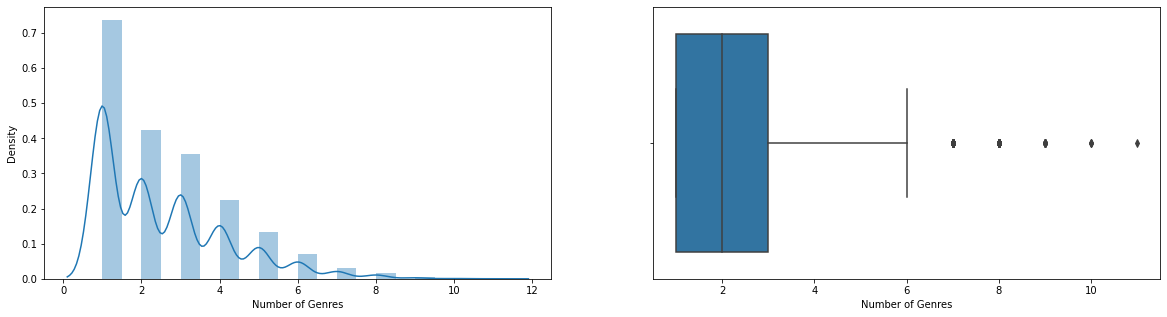

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_count_genres['Number of Genres'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_count_genres['Number of Genres'], ax = ax[1])
plt.show()

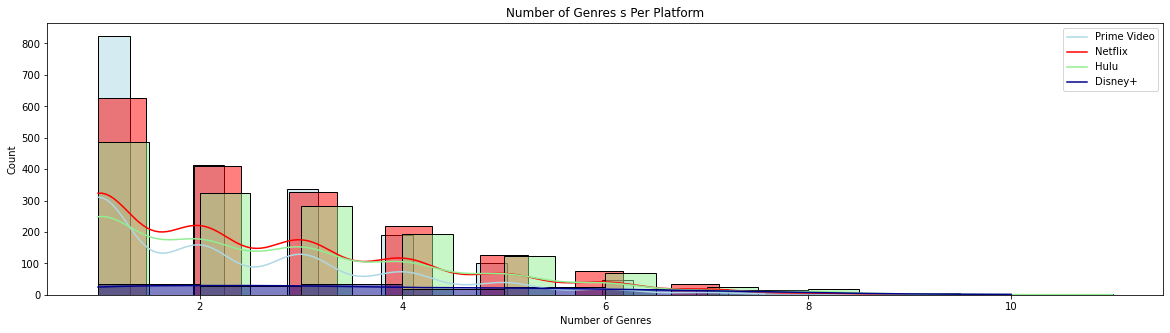

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Genres s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_genres_tvshows['Number of Genres'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_genres_tvshows['Number of Genres'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_genres_tvshows['Number of Genres'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_genres_tvshows['Number of Genres'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_tvshows_genre['Genres'].str.split(',').apply(pd.Series).stack()
del df_tvshows_genre['Genres']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Genre'
df_tvshows_genre = df_tvshows_genre.join(df_lan)
df_tvshows_genre.drop_duplicates(inplace = True)

In [49]:
df_tvshows_genre.head(5)

ID         Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1   Snowpiercer  2013  18  6.9              94        NA   
0   1   Snowpiercer  2013  18  6.9              94        NA   
0   1   Snowpiercer  2013  18  6.9              94        NA   
0   1   Snowpiercer  2013  18  6.9              94        NA   
1   2  Philadelphia  1993  13  8.8              80        NA   

                                                Cast        Country Language  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...  United States  English   

   ... Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  ...      60  tv series       3       1     0            0        0     1   
0  ...      60  tv series       3       1     0            0        0     1   
0  ...      60  tv series       3       1     0            0        0     1   
0  ...      60  tv series       3       1     0            0        0     1   
1  ...      22  tv series      18       1     0            0        0     1   

   Service Provider     Genre  
0           Netflix    Action  
0           Netflix     Drama  
0           Netflix    Sci-Fi  
0           Netflix  Thriller  
1           Netflix    Comedy  

[5 rows x 21 columns]

In [50]:
genre_count = df_tvshows_genre.groupby('Genre')['Title'].count()
genre_tvshows = df_tvshows_genre.groupby('Genre')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
genre_data_tvshows = pd.concat([genre_count, genre_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
genre_data_tvshows = genre_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [51]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genre_tvshows = netflix_genre_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genre_tvshows = hulu_genre_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genre_tvshows = prime_video_genre_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genre_tvshows = disney_genre_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

In [52]:
# Genre with TV Shows Counts - All Platforms Combined
genre_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
7         Drama            1852      754   552          650       41
4        Comedy            1571      569   600          461       90
2     Animation             985      341   372          312       75
6   Documentary             834      306   138          412       29
8        Family             729      238   195          263      110
0        Action             725      277   264          220       51
5         Crime             673      294   194          231        6
1     Adventure             670      246   217          215       78
9       Fantasy             631      241   246          188       42
23     Thriller             578      238   177          198        9

In [53]:
fig = px.bar(x = genre_data_tvshows['Genre'][:50],
             y = genre_data_tvshows['TV Shows Count'][:50], 
             color = genre_data_tvshows['TV Shows Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Genre', 'y' : 'TV Shows Count'},
             title  = 'Major Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [54]:
df_genre_high_tvshows = genre_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_genre_high_tvshows = df_genre_high_tvshows.drop(['index'], axis = 1)
# filter = (genre_data_tvshows['TV Shows Count'] == (genre_data_tvshows['TV Shows Count'].max()))
# df_genre_high_tvshows = genre_data_tvshows[filter]
 
# highest_rated_tvshows = genre_data_tvshows.loc[genre_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nGenre with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_genre_high_tvshows.head(5)


Genre with Highest Ever TV Shows Count are : All Platforms Combined



Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        Drama            1852      754   552          650       41
1       Comedy            1571      569   600          461       90
2    Animation             985      341   372          312       75
3  Documentary             834      306   138          412       29
4       Family             729      238   195          263      110

In [55]:
fig = px.bar(y = df_genre_high_tvshows['Genre'][:15],
             x = df_genre_high_tvshows['TV Shows Count'][:15], 
             color = df_genre_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'TV Shows Count'},
             title  = 'Genre with Highest TV Shows : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [56]:
df_genre_low_tvshows = genre_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_genre_low_tvshows = df_genre_low_tvshows.drop(['index'], axis = 1)
# filter = (genre_data_tvshows['TV Shows Count'] == (genre_data_tvshows['TV Shows Count'].min()))
# df_genre_low_tvshows = genre_data_tvshows[filter]

print('\nGenre with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_genre_low_tvshows.head(5)


Genre with Lowest Ever TV Shows Count are : All Platforms Combined



Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Western              47        9    11           31        1
1       News              53       10    28           18        0
2    Musical              75       31    14           19       18
3        War              94       38    17           42        0
4  Talk-Show             107       28    48           34        2

In [57]:
fig = px.bar(y = df_genre_low_tvshows['Genre'][:15],
             x = df_genre_low_tvshows['TV Shows Count'][:15], 
             color = df_genre_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'TV Shows Count'},
             title  = 'Genre with Lowest TV Shows Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [58]:
print(f'''
      Total '{genre_data_tvshows['Genre'].unique().shape[0]}' unique Genre Count s were Given, They were Like this,\n
      
      {genre_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Genre'].unique()[:5]}\n
 
      The Highest Ever TV Shows Count Ever Any TV Show Got is '{df_genre_high_tvshows['Genre'][0]}' : '{df_genre_high_tvshows['TV Shows Count'].max()}'\n
 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is '{df_genre_low_tvshows['Genre'][0]}' : '{df_genre_low_tvshows['TV Shows Count'].min()}'\n
      ''')


      Total '26' unique Genre Count s were Given, They were Like this,

      
      ['Drama' 'Comedy' 'Animation' 'Documentary' 'Family']

 
      The Highest Ever TV Shows Count Ever Any TV Show Got is 'Drama' : '1852'

 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is 'Western' : '47'

      


In [59]:
fig = px.pie(genre_data_tvshows[:10], names = 'Genre', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Genre')
fig.show()

In [60]:
# netflix_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_genre_tvshows = netflix_genre_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_genre_high_tvshows = df_genre_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genre_high_tvshows = netflix_genre_high_tvshows.drop(['index'], axis = 1)
 
netflix_genre_low_tvshows = df_genre_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_genre_low_tvshows = netflix_genre_low_tvshows.drop(['index'], axis = 1)
 
netflix_genre_high_tvshows.head(5)

Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        Drama            1852      754   552          650       41
1       Comedy            1571      569   600          461       90
2    Animation             985      341   372          312       75
3  Documentary             834      306   138          412       29
4        Crime             673      294   194          231        6

In [61]:
fig = px.bar(x = netflix_genre_high_tvshows['Genre'][:15],
             y = netflix_genre_high_tvshows['Netflix'][:15], 
             color = netflix_genre_high_tvshows['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'TV Shows Count'},
             title  = 'Genre with Highest TV Shows : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [62]:
# hulu_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_genre_tvshows = hulu_genre_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_genre_high_tvshows = df_genre_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genre_high_tvshows = hulu_genre_high_tvshows.drop(['index'], axis = 1)
 
hulu_genre_low_tvshows = df_genre_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_genre_low_tvshows = hulu_genre_low_tvshows.drop(['index'], axis = 1)
 
hulu_genre_high_tvshows.head(5)

Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0      Comedy            1571      569   600          461       90
1       Drama            1852      754   552          650       41
2   Animation             985      341   372          312       75
3      Action             725      277   264          220       51
4  Reality-TV             571      167   247          186       22

In [63]:
fig = px.bar(x = hulu_genre_high_tvshows['Genre'][:15],
             y = hulu_genre_high_tvshows['Hulu'][:15], 
             color = hulu_genre_high_tvshows['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'TV Shows Count'},
             title  = 'Genre with Highest TV Shows : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [64]:
# prime_video_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_genre_tvshows = prime_video_genre_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_genre_high_tvshows = df_genre_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genre_high_tvshows = prime_video_genre_high_tvshows.drop(['index'], axis = 1)
 
prime_video_genre_low_tvshows = df_genre_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_genre_low_tvshows = prime_video_genre_low_tvshows.drop(['index'], axis = 1)
 
prime_video_genre_high_tvshows.head(5)

Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        Drama            1852      754   552          650       41
1       Comedy            1571      569   600          461       90
2  Documentary             834      306   138          412       29
3    Animation             985      341   372          312       75
4       Family             729      238   195          263      110

In [65]:
fig = px.bar(x = prime_video_genre_high_tvshows['Genre'][:15],
             y = prime_video_genre_high_tvshows['Prime Video'][:15], 
             color = prime_video_genre_high_tvshows['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'TV Shows Count'},
             title  = 'Genre with Highest TV Shows : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [66]:
# disney_genre_tvshows = genre_data_tvshows[genre_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_genre_tvshows = disney_genre_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_genre_high_tvshows = df_genre_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genre_high_tvshows = disney_genre_high_tvshows.drop(['index'], axis = 1)
 
disney_genre_low_tvshows = df_genre_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_genre_low_tvshows = disney_genre_low_tvshows.drop(['index'], axis = 1)
 
disney_genre_high_tvshows.head(5)

Genre  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0     Family             729      238   195          263      110
1     Comedy            1571      569   600          461       90
2  Adventure             670      246   217          215       78
3  Animation             985      341   372          312       75
4     Action             725      277   264          220       51

In [67]:
fig = px.bar(x = disney_genre_high_tvshows['Genre'][:15],
             y = disney_genre_high_tvshows['Disney+'][:15], 
             color = disney_genre_high_tvshows['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'TV Shows Count'},
             title  = 'Genre with Highest TV Shows : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

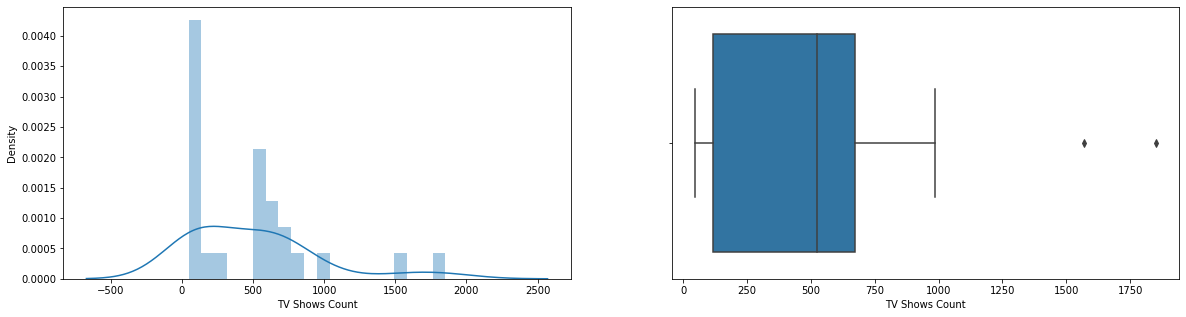

In [68]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(genre_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(genre_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

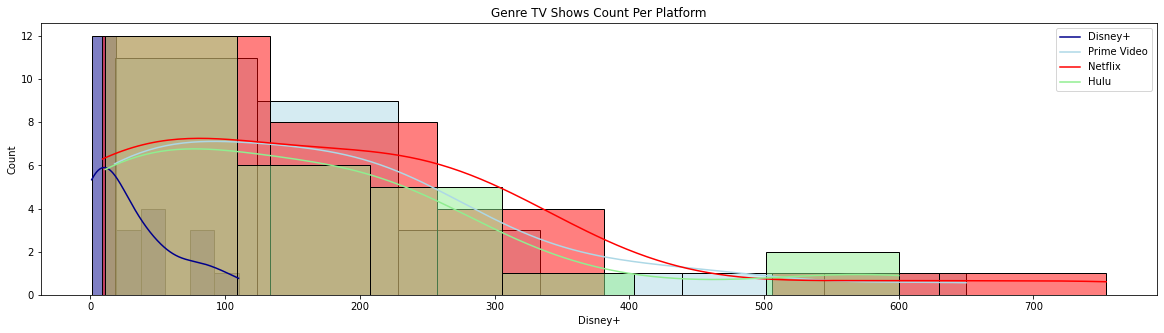

In [69]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Genre TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_genre_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_genre_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_genre_tvshows['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_genre_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [70]:
print(f'''
      The Genre with Highest TV Shows Count Ever Got is '{df_genre_high_tvshows['Genre'][0]}' : '{df_genre_high_tvshows['TV Shows Count'].max()}'\n
      The Genre with Lowest TV Shows Count Ever Got is '{df_genre_low_tvshows['Genre'][0]}' : '{df_genre_low_tvshows['TV Shows Count'].min()}'\n
      
      The Genre with Highest TV Shows Count on 'Netflix' is '{netflix_genre_high_tvshows['Genre'][0]}' : '{netflix_genre_high_tvshows['Netflix'].max()}'\n
      The Genre with Lowest TV Shows Count on 'Netflix' is '{netflix_genre_low_tvshows['Genre'][0]}' : '{netflix_genre_low_tvshows['Netflix'].min()}'\n
      
      The Genre with Highest TV Shows Count on 'Hulu' is '{hulu_genre_high_tvshows['Genre'][0]}' : '{hulu_genre_high_tvshows['Hulu'].max()}'\n
      The Genre with Lowest TV Shows Count on 'Hulu' is '{hulu_genre_low_tvshows['Genre'][0]}' : '{hulu_genre_low_tvshows['Hulu'].min()}'\n
      
      The Genre with Highest TV Shows Count on 'Prime Video' is '{prime_video_genre_high_tvshows['Genre'][0]}' : '{prime_video_genre_high_tvshows['Prime Video'].max()}'\n
      The Genre with Lowest TV Shows Count on 'Prime Video' is '{prime_video_genre_low_tvshows['Genre'][0]}' : '{prime_video_genre_low_tvshows['Prime Video'].min()}'\n
      
      The Genre with Highest TV Shows Count on 'Disney+' is '{disney_genre_high_tvshows['Genre'][0]}' : '{disney_genre_high_tvshows['Disney+'].max()}'\n
      The Genre with Lowest TV Shows Count on 'Disney+' is '{disney_genre_low_tvshows['Genre'][0]}' : '{disney_genre_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Genre with Highest TV Shows Count Ever Got is 'Drama' : '1852'

      The Genre with Lowest TV Shows Count Ever Got is 'Western' : '47'

      
      The Genre with Highest TV Shows Count on 'Netflix' is 'Drama' : '754'

      The Genre with Lowest TV Shows Count on 'Netflix' is 'Western' : '9'

      
      The Genre with Highest TV Shows Count on 'Hulu' is 'Comedy' : '600'

      The Genre with Lowest TV Shows Count on 'Hulu' is 'Western' : '11'

      
      The Genre with Highest TV Shows Count on 'Prime Video' is 'Drama' : '650'

      The Genre with Lowest TV Shows Count on 'Prime Video' is 'News' : '18'

      
      The Genre with Highest TV Shows Count on 'Disney+' is 'Family' : '110'

      The Genre with Lowest TV Shows Count on 'Disney+' is 'War' : '0'
 
      


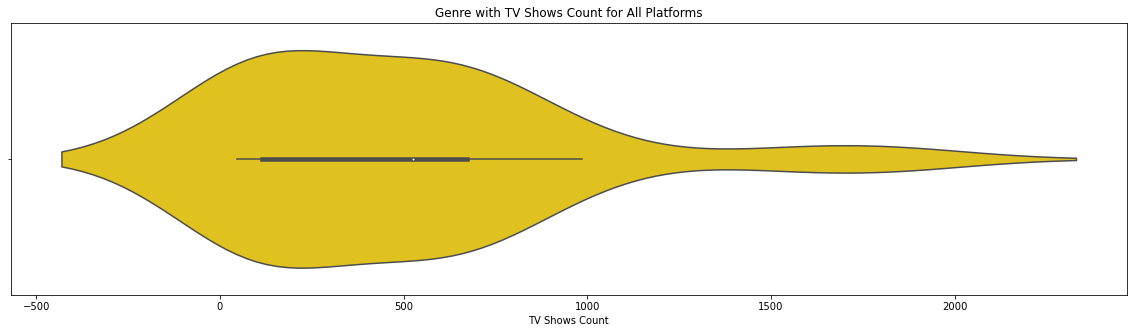

In [71]:
# Distribution of tvshows genre in each platform
plt.figure(figsize = (20, 5))
plt.title('Genre with TV Shows Count for All Platforms')
sns.violinplot(x = genre_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

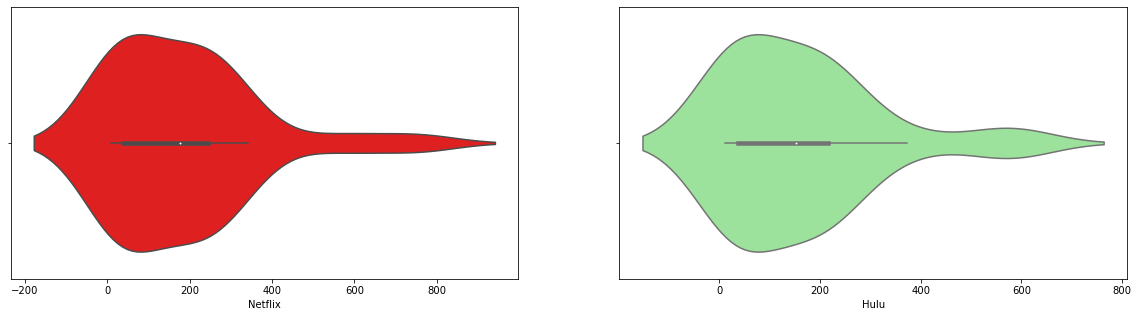

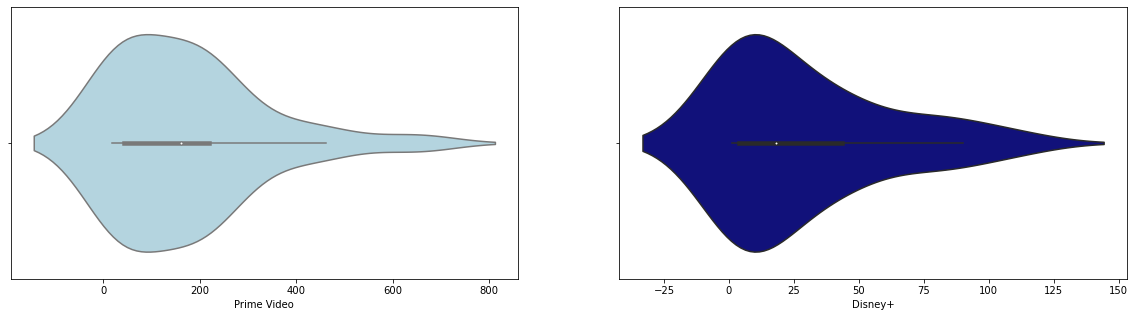

In [72]:
# Distribution of Genre TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_genre_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_genre_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_genre_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_genre_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [73]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Genre is '{round(genre_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genre on 'Netflix' is '{round(netflix_genre_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genre on 'Hulu' is '{round(hulu_genre_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genre on 'Prime Video' is '{round(prime_video_genre_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genre on 'Disney+' is '{round(disney_genre_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Genre is '495.88'

      The Average TV Shows Count of Genre on 'Netflix' is '182.96'

      The Average TV Shows Count of Genre on 'Hulu' is '161.42'

      The Average TV Shows Count of Genre on 'Prime Video' is '170.92'

      The Average TV Shows Count of Genre on 'Disney+' is '29.3'
 
      


In [74]:
print(f'''
      Accross All Platforms Total Count of Genre is '{genre_data_tvshows['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Netflix' is '{netflix_genre_tvshows['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Hulu' is '{hulu_genre_tvshows['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Prime Video' is '{prime_video_genre_tvshows['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Disney+' is '{disney_genre_tvshows['Genre'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Genre is '26'

      Total Count of Genre on 'Netflix' is '26'

      Total Count of Genre on 'Hulu' is '26'

      Total Count of Genre on 'Prime Video' is '26'

      Total Count of Genre on 'Disney+' is '23'
 
      


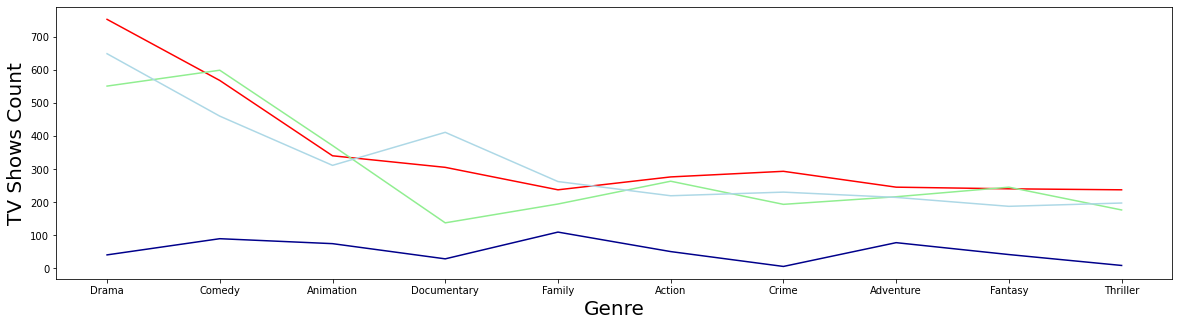

In [75]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = genre_data_tvshows['Genre'][:10], y = genre_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = genre_data_tvshows['Genre'][:10], y = genre_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = genre_data_tvshows['Genre'][:10], y = genre_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = genre_data_tvshows['Genre'][:10], y = genre_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('TV Shows Count', fontsize = 20)
plt.show()

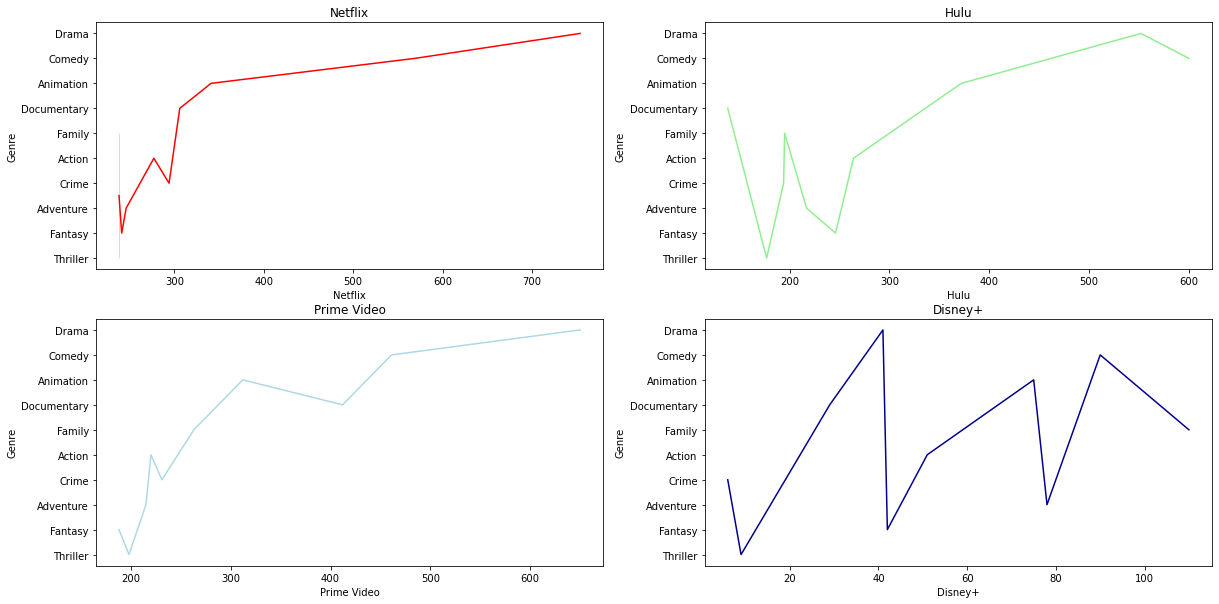

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_g_ax1 = sns.lineplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_g_ax2 = sns.lineplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_g_ax3 = sns.lineplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_g_ax4 = sns.lineplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

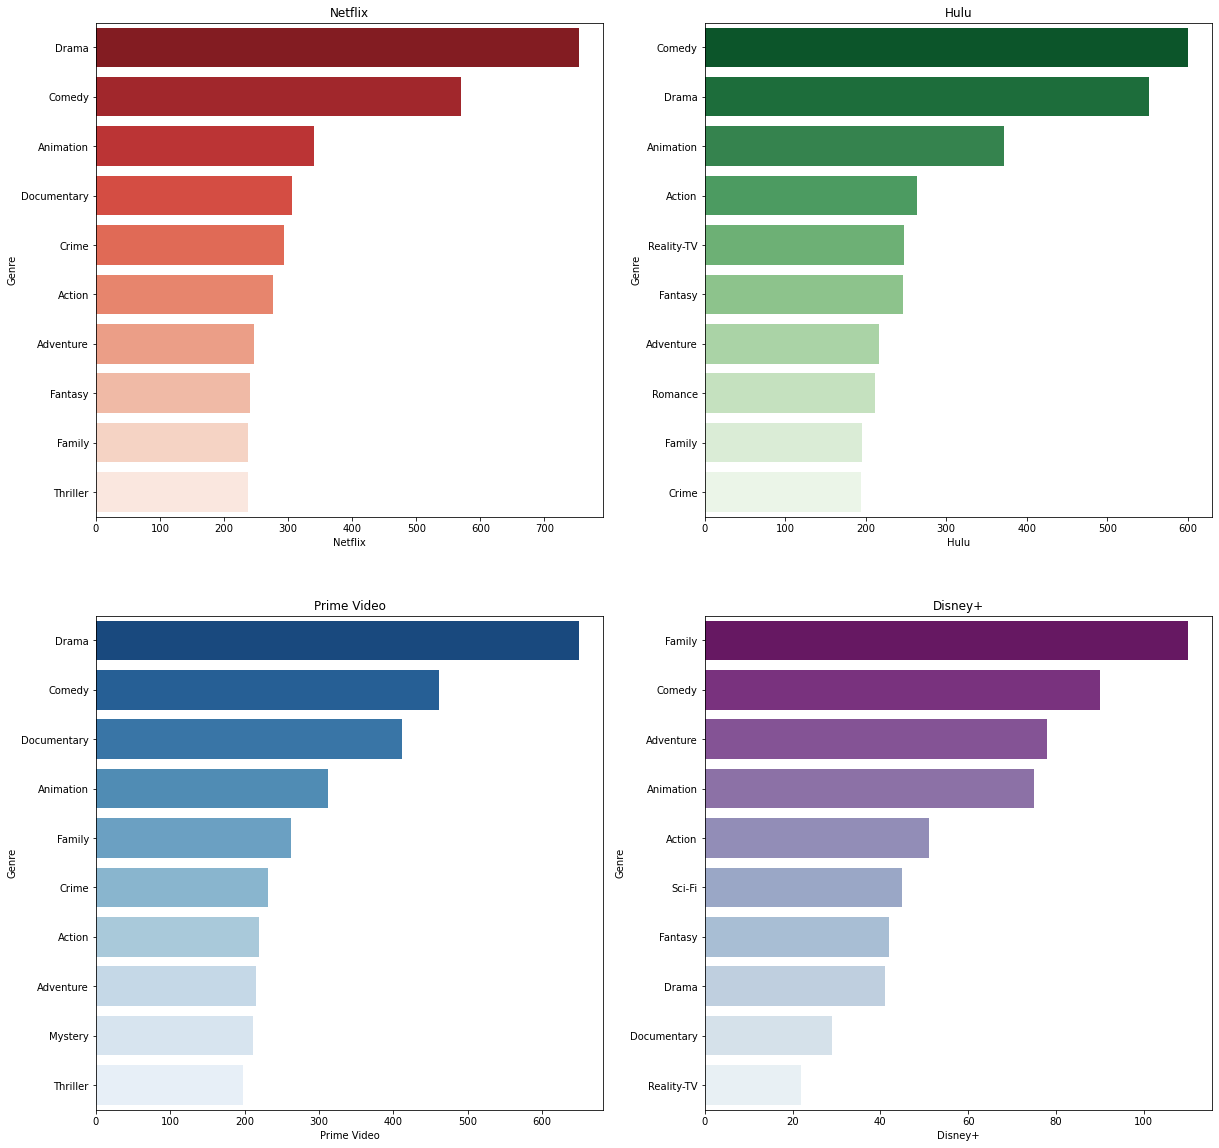

In [77]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_g_ax1 = sns.barplot(y = netflix_genre_tvshows['Genre'][:10], x = netflix_genre_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_g_ax2 = sns.barplot(y = hulu_genre_tvshows['Genre'][:10], x = hulu_genre_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_g_ax3 = sns.barplot(y = prime_video_genre_tvshows['Genre'][:10], x = prime_video_genre_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_g_ax4 = sns.barplot(y = disney_genre_tvshows['Genre'][:10], x = disney_genre_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

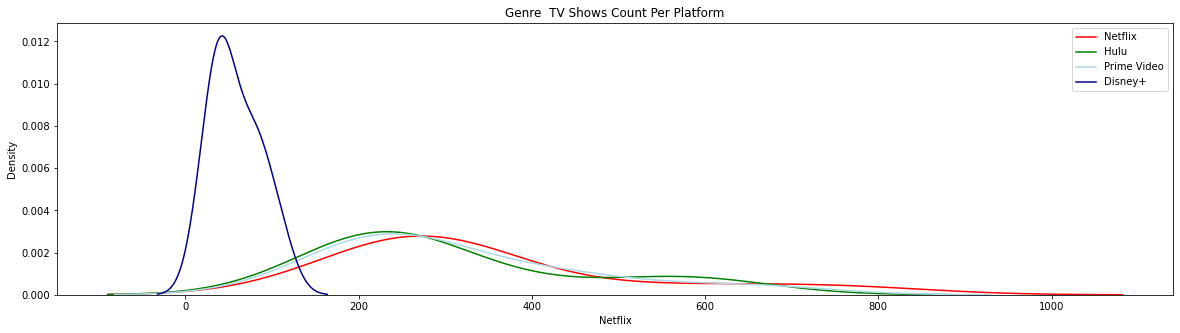

In [78]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Genre  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_genre_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_genre_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_genre_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_genre_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

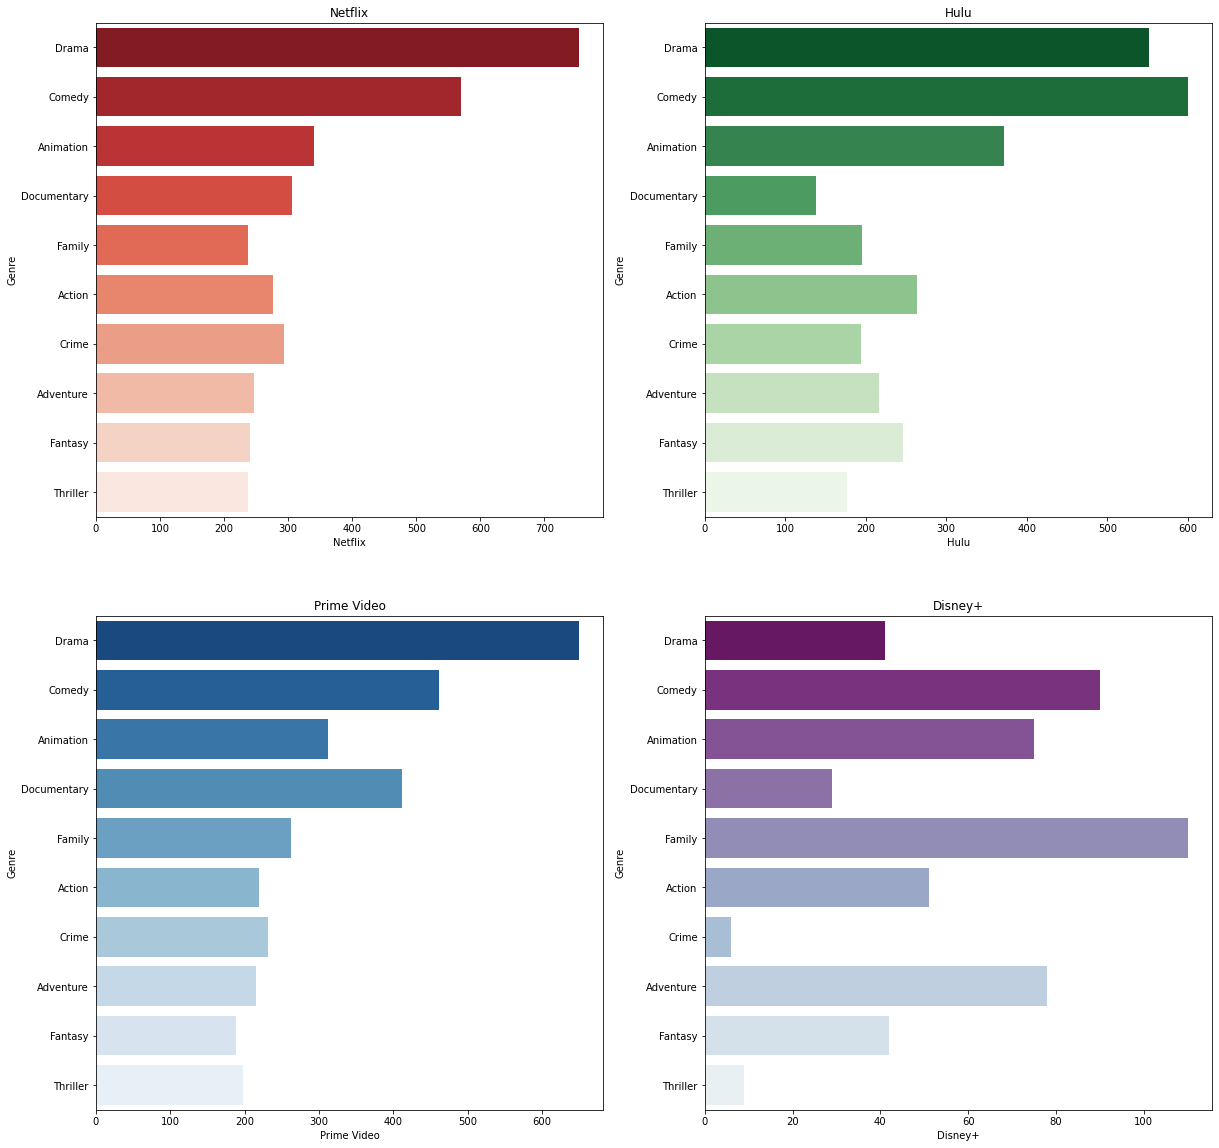

In [79]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_g_ax1 = sns.barplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_g_ax2 = sns.barplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_g_ax3 = sns.barplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_g_ax4 = sns.barplot(y = genre_data_tvshows['Genre'][:10], x = genre_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

In [80]:
df_tvshows_mixed_genres.drop(df_tvshows_mixed_genres.loc[df_tvshows_mixed_genres['Genres'] == "NA"].index, inplace = True)
# df_tvshows_mixed_genres = df_tvshows_mixed_genres[df_tvshows_mixed_genres.Genre != "NA"]
df_tvshows_mixed_genres.drop(df_tvshows_mixed_genres.loc[df_tvshows_mixed_genres['Number of Genres'] == 1].index, inplace = True)

In [81]:
df_tvshows_mixed_genres.head(5)

ID         Title  Year Age IMDb Rotten Tomatoes      Directors  \
0   1   Snowpiercer  2013  18  6.9              94             NA   
2   3          Roma  2018  18  8.7              93             NA   
5   6       Suburra  2015  NR  7.9              91             NA   
6   7  A Wednesday!  2008  NR  8.1              NA  Neeraj Pandey   
7   8   Retribution  2015  NR    7              28             NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
5  Alessandro Borghi,Giacomo Ferrara,Filippo Nigr...   
6                                                 NA   
7  Joanna Vanderham,John Lynch,Joe Dempsie,Julie ...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
5                      Action,Crime                         Italy  ...   
6      Comedy,Family,Fantasy,Horror                 United States  ...   
7            Drama,Mystery,Thriller                United Kingdom  ...   

  Runtime       Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0      60  tv series       3       1    0            0        0     1   
2      52  tv series       2       1    0            0        0     1   
5      50  tv series       3       1    0            0        0     1   
6     104  tv series       1       1    0            0        0     1   
7     231  tv series       1       1    0            1        0     1   

   Service Provider  Number of Genres  
0           Netflix                 4  
2           Netflix                 5  
5           Netflix                 2  
6           Netflix                 4  
7           Netflix                 3  

[5 rows x 22 columns]

In [82]:
mixed_genres_count = df_tvshows_mixed_genres.groupby('Genres')['Title'].count()
mixed_genres_tvshows = df_tvshows_mixed_genres.groupby('Genres')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_genres_data_tvshows = pd.concat([mixed_genres_count, mixed_genres_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count', 'Genres' : 'Mixed Genre'})
mixed_genres_data_tvshows = mixed_genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [83]:
mixed_genres_data_tvshows.head(5)

Mixed Genre  TV Shows Count  Netflix  Hulu  Prime Video  \
629                  Comedy,Drama              92       44    28           29   
745  Crime,Drama,Mystery,Thriller              79       27    27           32   
912                 Drama,Romance              76       38    18           26   
739           Crime,Drama,Mystery              67       19    21           33   
796             Documentary,Crime              66       32    24           20   

     Disney+  
629        0  
745        1  
912        0  
739        0  
796        0

In [84]:
# Mixed Genre with TV Shows Counts - All Platforms Combined
mixed_genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Mixed Genre  TV Shows Count  Netflix  Hulu  Prime Video  \
629                  Comedy,Drama              92       44    28           29   
745  Crime,Drama,Mystery,Thriller              79       27    27           32   
912                 Drama,Romance              76       38    18           26   
739           Crime,Drama,Mystery              67       19    21           33   
796             Documentary,Crime              66       32    24           20   
530              Animation,Family              66       19    10           40   
720                   Crime,Drama              60       29    13           22   
749          Crime,Drama,Thriller              54       27     8           20   
663          Comedy,Drama,Romance              51       25    17           13   
815           Documentary,History              48       14     3           28   

     Disney+  
629        0  
745        1  
912        0  
739        0  
796        0  
530        1  
720        0  
749        0  
663        0  
815        3

In [85]:
df_mixed_genres_high_tvshows = mixed_genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_mixed_genres_high_tvshows = df_mixed_genres_high_tvshows.drop(['index'], axis = 1)
# filter = (mixed_genres_data_tvshows['TV Shows Count'] = =  (mixed_genres_data_tvshows['TV Shows Count'].max()))
# df_mixed_genres_high_tvshows = mixed_genres_data_tvshows[filter]
 
# highest_rated_tvshows = mixed_genres_data_tvshows.loc[mixed_genres_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nMixed Genre with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_genres_high_tvshows.head(5)


Mixed Genre with Highest Ever TV Shows Count are : All Platforms Combined



Mixed Genre  TV Shows Count  Netflix  Hulu  Prime Video  \
0                  Comedy,Drama              92       44    28           29   
1  Crime,Drama,Mystery,Thriller              79       27    27           32   
2                 Drama,Romance              76       38    18           26   
3           Crime,Drama,Mystery              67       19    21           33   
4             Documentary,Crime              66       32    24           20   

   Disney+  
0        0  
1        1  
2        0  
3        0  
4        0

In [86]:
fig = px.bar(y = df_mixed_genres_high_tvshows['Mixed Genre'][:15],
             x = df_mixed_genres_high_tvshows['TV Shows Count'][:15], 
             color = df_mixed_genres_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Genre'},
             title  = 'TV Shows with Highest Number of Mixed Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [87]:
df_mixed_genres_low_tvshows = mixed_genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_mixed_genres_low_tvshows = df_mixed_genres_low_tvshows.drop(['index'], axis = 1)
# filter = (mixed_genres_data_tvshows['TV Shows Count'] = =  (mixed_genres_data_tvshows['TV Shows Count'].min()))
# df_mixed_genres_low_tvshows = mixed_genres_data_tvshows[filter]
 
print('\nMixed Genre with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_genres_low_tvshows.head(5)


Mixed Genre with Lowest Ever TV Shows Count are : All Platforms Combined



Mixed Genre  TV Shows Count  Netflix  \
0                 Short,Comedy,Drama,Fantasy,Romance               1        0   
1          Adventure,Biography,Drama,History,Romance               1        0   
2      Adventure,Comedy,Crime,Drama,Romance,Thriller               1        1   
3                      Adventure,Comedy,Drama,Family               1        0   
4  Adventure,Comedy,Drama,Family,Fantasy,Horror,M...               1        0   

   Hulu  Prime Video  Disney+  
0     0            1        0  
1     0            1        0  
2     0            0        0  
3     0            1        0  
4     0            1        0

In [88]:
fig = px.bar(y = df_mixed_genres_low_tvshows['Mixed Genre'][:15],
             x = df_mixed_genres_low_tvshows['TV Shows Count'][:15], 
             color = df_mixed_genres_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Genre'},
             title  = 'TV Shows with Lowest Number of Mixed Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [89]:
print(f'''
      Total '{df_tvshows_genres['Genres'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{mixed_genres_data_tvshows['Mixed Genre'].unique().shape[0]}' Mixed Genre, They were Like this, \n
 
      {mixed_genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Mixed Genre'].head(5).unique()} etc. \n
 
      The Mixed Genre with Highest TV Shows Count have '{mixed_genres_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_mixed_genres_high_tvshows['Mixed Genre'][0]}', &\n
      The Mixed Genre with Lowest TV Shows Count have '{mixed_genres_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_mixed_genres_low_tvshows['Mixed Genre'][0]}'
      ''')


      Total '5109' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '1006' Mixed Genre, They were Like this, 

 
      ['Comedy,Drama' 'Crime,Drama,Mystery,Thriller' 'Drama,Romance'
 'Crime,Drama,Mystery' 'Documentary,Crime'] etc. 

 
      The Mixed Genre with Highest TV Shows Count have '92' TV Shows Available is 'Comedy,Drama', &

      The Mixed Genre with Lowest TV Shows Count have '1' TV Shows Available is 'Short,Comedy,Drama,Fantasy,Romance'
      


In [90]:
fig = px.pie(mixed_genres_data_tvshows[:10], names = 'Mixed Genre', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Mixed Genre')
fig.show()

In [91]:
# netflix_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_genres_tvshows = netflix_mixed_genres_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_mixed_genres_high_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_genres_high_tvshows = netflix_mixed_genres_high_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_genres_low_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_genres_low_tvshows = netflix_mixed_genres_low_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_genres_high_tvshows.head(5)

Mixed Genre  TV Shows Count  Netflix  Hulu  Prime Video  \
0                  Comedy,Drama              92       44    28           29   
1                 Drama,Romance              76       38    18           26   
2             Documentary,Crime              66       32    24           20   
3                   Crime,Drama              60       29    13           22   
4  Crime,Drama,Mystery,Thriller              79       27    27           32   

   Disney+  
0        0  
1        0  
2        0  
3        0  
4        1

In [92]:
# hulu_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_genres_tvshows = hulu_mixed_genres_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_mixed_genres_high_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_genres_high_tvshows = hulu_mixed_genres_high_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_genres_low_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_genres_low_tvshows = hulu_mixed_genres_low_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_genres_high_tvshows.head(5)

Mixed Genre  TV Shows Count  Netflix  Hulu  Prime Video  \
0                  Comedy,Drama              92       44    28           29   
1  Crime,Drama,Mystery,Thriller              79       27    27           32   
2             Documentary,Crime              66       32    24           20   
3          Game-Show,Reality-TV              30        6    23            7   
4              Animation,Comedy              40        7    23           11   

   Disney+  
0        0  
1        1  
2        0  
3        0  
4        2

In [93]:
# prime_video_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_genres_tvshows = prime_video_mixed_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_mixed_genres_high_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_genres_high_tvshows = prime_video_mixed_genres_high_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_genres_low_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_genres_low_tvshows = prime_video_mixed_genres_low_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_genres_high_tvshows.head(5)

Mixed Genre  TV Shows Count  Netflix  Hulu  Prime Video  \
0              Animation,Family              66       19    10           40   
1           Crime,Drama,Mystery              67       19    21           33   
2  Crime,Drama,Mystery,Thriller              79       27    27           32   
3                  Comedy,Drama              92       44    28           29   
4           Documentary,History              48       14     3           28   

   Disney+  
0        1  
1        0  
2        1  
3        0  
4        3

In [94]:
# disney_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_genres_tvshows = disney_mixed_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_mixed_genres_high_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_genres_high_tvshows = disney_mixed_genres_high_tvshows.drop(['index'], axis = 1)
 
disney_mixed_genres_low_tvshows = df_mixed_genres_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_genres_low_tvshows = disney_mixed_genres_low_tvshows.drop(['index'], axis = 1)
 
disney_mixed_genres_high_tvshows.head(5)

Mixed Genre  TV Shows Count  Netflix  Hulu  \
0                             Comedy,Family              48       12    16   
1                    Adventure,Drama,Family               9        1     0   
2                       Comedy,Drama,Family              13        2     6   
3         Animation,Adventure,Comedy,Family              13        5     2   
4  Animation,Action,Adventure,Comedy,Sci-Fi               6        1     1   

   Prime Video  Disney+  
0           18        9  
1            1        7  
2            0        6  
3            3        4  
4            0        4

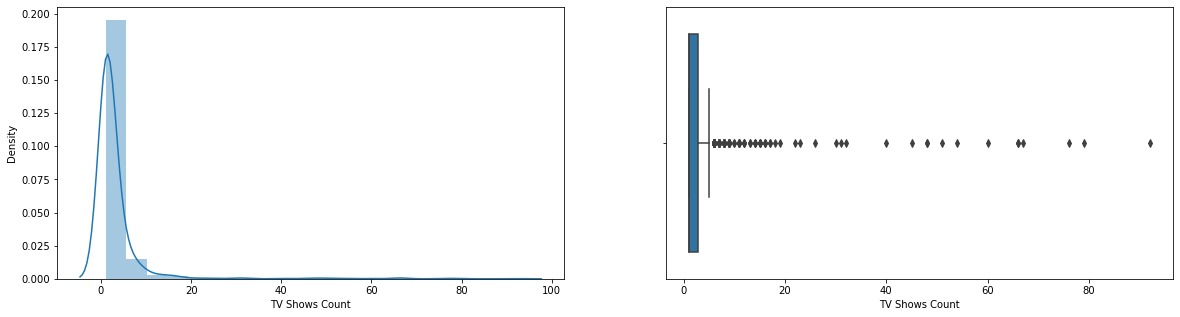

In [95]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_genres_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_genres_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [96]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_genres_tvshows = netflix_mixed_genres_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_genres_tvshows = hulu_mixed_genres_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_genres_tvshows = prime_video_mixed_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_mixed_genres_tvshows = mixed_genres_data_tvshows[mixed_genres_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_genres_tvshows = disney_mixed_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

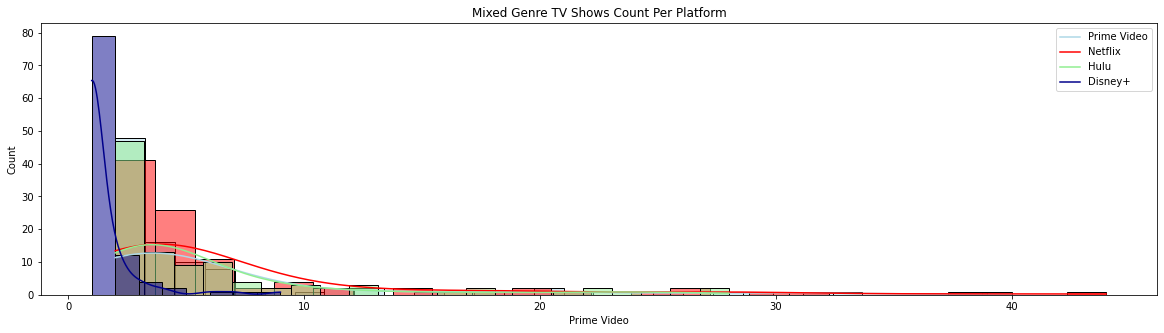

In [97]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Genre TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_genres_tvshows['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_genres_tvshows['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_genres_tvshows['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_genres_tvshows['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [98]:
print(f'''
      The Mixed Genre with Highest TV Shows Count Ever Got is '{df_mixed_genres_high_tvshows['Mixed Genre'][0]}' : '{df_mixed_genres_high_tvshows['TV Shows Count'].max()}'\n
      The Mixed Genre with Lowest TV Shows Count Ever Got is '{df_mixed_genres_low_tvshows['Mixed Genre'][0]}' : '{df_mixed_genres_low_tvshows['TV Shows Count'].min()}'\n
      
      The Mixed Genre with Highest TV Shows Count on 'Netflix' is '{netflix_mixed_genres_high_tvshows['Mixed Genre'][0]}' : '{netflix_mixed_genres_high_tvshows['Netflix'].max()}'\n
      The Mixed Genre with Lowest TV Shows Count on 'Netflix' is '{netflix_mixed_genres_low_tvshows['Mixed Genre'][0]}' : '{netflix_mixed_genres_low_tvshows['Netflix'].min()}'\n
      
      The Mixed Genre with Highest TV Shows Count on 'Hulu' is '{hulu_mixed_genres_high_tvshows['Mixed Genre'][0]}' : '{hulu_mixed_genres_high_tvshows['Hulu'].max()}'\n
      The Mixed Genre with Lowest TV Shows Count on 'Hulu' is '{hulu_mixed_genres_low_tvshows['Mixed Genre'][0]}' : '{hulu_mixed_genres_low_tvshows['Hulu'].min()}'\n
      
      The Mixed Genre with Highest TV Shows Count on 'Prime Video' is '{prime_video_mixed_genres_high_tvshows['Mixed Genre'][0]}' : '{prime_video_mixed_genres_high_tvshows['Prime Video'].max()}'\n
      The Mixed Genre with Lowest TV Shows Count on 'Prime Video' is '{prime_video_mixed_genres_low_tvshows['Mixed Genre'][0]}' : '{prime_video_mixed_genres_low_tvshows['Prime Video'].min()}'\n
      
      The Mixed Genre with Highest TV Shows Count on 'Disney+' is '{disney_mixed_genres_high_tvshows['Mixed Genre'][0]}' : '{disney_mixed_genres_high_tvshows['Disney+'].max()}'\n
      The Mixed Genre with Lowest TV Shows Count on 'Disney+' is '{disney_mixed_genres_low_tvshows['Mixed Genre'][0]}' : '{disney_mixed_genres_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Mixed Genre with Highest TV Shows Count Ever Got is 'Comedy,Drama' : '92'

      The Mixed Genre with Lowest TV Shows Count Ever Got is 'Short,Comedy,Drama,Fantasy,Romance' : '1'

      
      The Mixed Genre with Highest TV Shows Count on 'Netflix' is 'Comedy,Drama' : '44'

      The Mixed Genre with Lowest TV Shows Count on 'Netflix' is 'Action,Adventure,Fantasy,Mystery,Romance,Sci-Fi' : '0'

      
      The Mixed Genre with Highest TV Shows Count on 'Hulu' is 'Comedy,Drama' : '28'

      The Mixed Genre with Lowest TV Shows Count on 'Hulu' is 'Sport,Talk-Show' : '0'

      
      The Mixed Genre with Highest TV Shows Count on 'Prime Video' is 'Animation,Family' : '40'

      The Mixed Genre with Lowest TV Shows Count on 'Prime Video' is 'Sport,Talk-Show' : '0'

      
      The Mixed Genre with Highest TV Shows Count on 'Disney+' is 'Comedy,Family' : '9'

      The Mixed Genre with Lowest TV Shows Count on 'Disney+' is 'Comedy,Drama' : '0'
 
      


In [99]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Mixed Genre is '{round(mixed_genres_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Genre on 'Netflix' is '{round(netflix_mixed_genres_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Genre on 'Hulu' is '{round(hulu_mixed_genres_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Genre on 'Prime Video' is '{round(prime_video_mixed_genres_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Genre on 'Disney+' is '{round(disney_mixed_genres_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Mixed Genre is '3.21'

      The Average TV Shows Count of Mixed Genre on 'Netflix' is '2.35'

      The Average TV Shows Count of Mixed Genre on 'Hulu' is '2.19'

      The Average TV Shows Count of Mixed Genre on 'Prime Video' is '2.29'

      The Average TV Shows Count of Mixed Genre on 'Disney+' is '1.45'
 
      


In [100]:
print(f'''
      Accross All Platforms Total Count of Mixed Genre is '{mixed_genres_data_tvshows['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Netflix' is '{netflix_mixed_genres_tvshows['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Hulu' is '{hulu_mixed_genres_tvshows['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Prime Video' is '{prime_video_mixed_genres_tvshows['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Disney+' is '{disney_mixed_genres_tvshows['Mixed Genre'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Genre is '1006'

      Total Count of Mixed Genre on 'Netflix' is '513'

      Total Count of Mixed Genre on 'Hulu' is '477'

      Total Count of Mixed Genre on 'Prime Video' is '489'

      Total Count of Mixed Genre on 'Disney+' is '100'
 
      


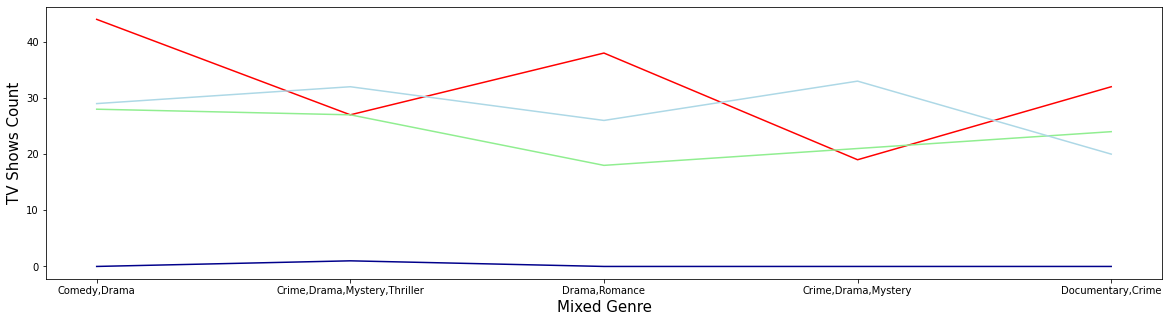

In [101]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_genres_data_tvshows['Mixed Genre'][:5], y = mixed_genres_data_tvshows['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_genres_data_tvshows['Mixed Genre'][:5], y = mixed_genres_data_tvshows['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_genres_data_tvshows['Mixed Genre'][:5], y = mixed_genres_data_tvshows['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_genres_data_tvshows['Mixed Genre'][:5], y = mixed_genres_data_tvshows['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Genre', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

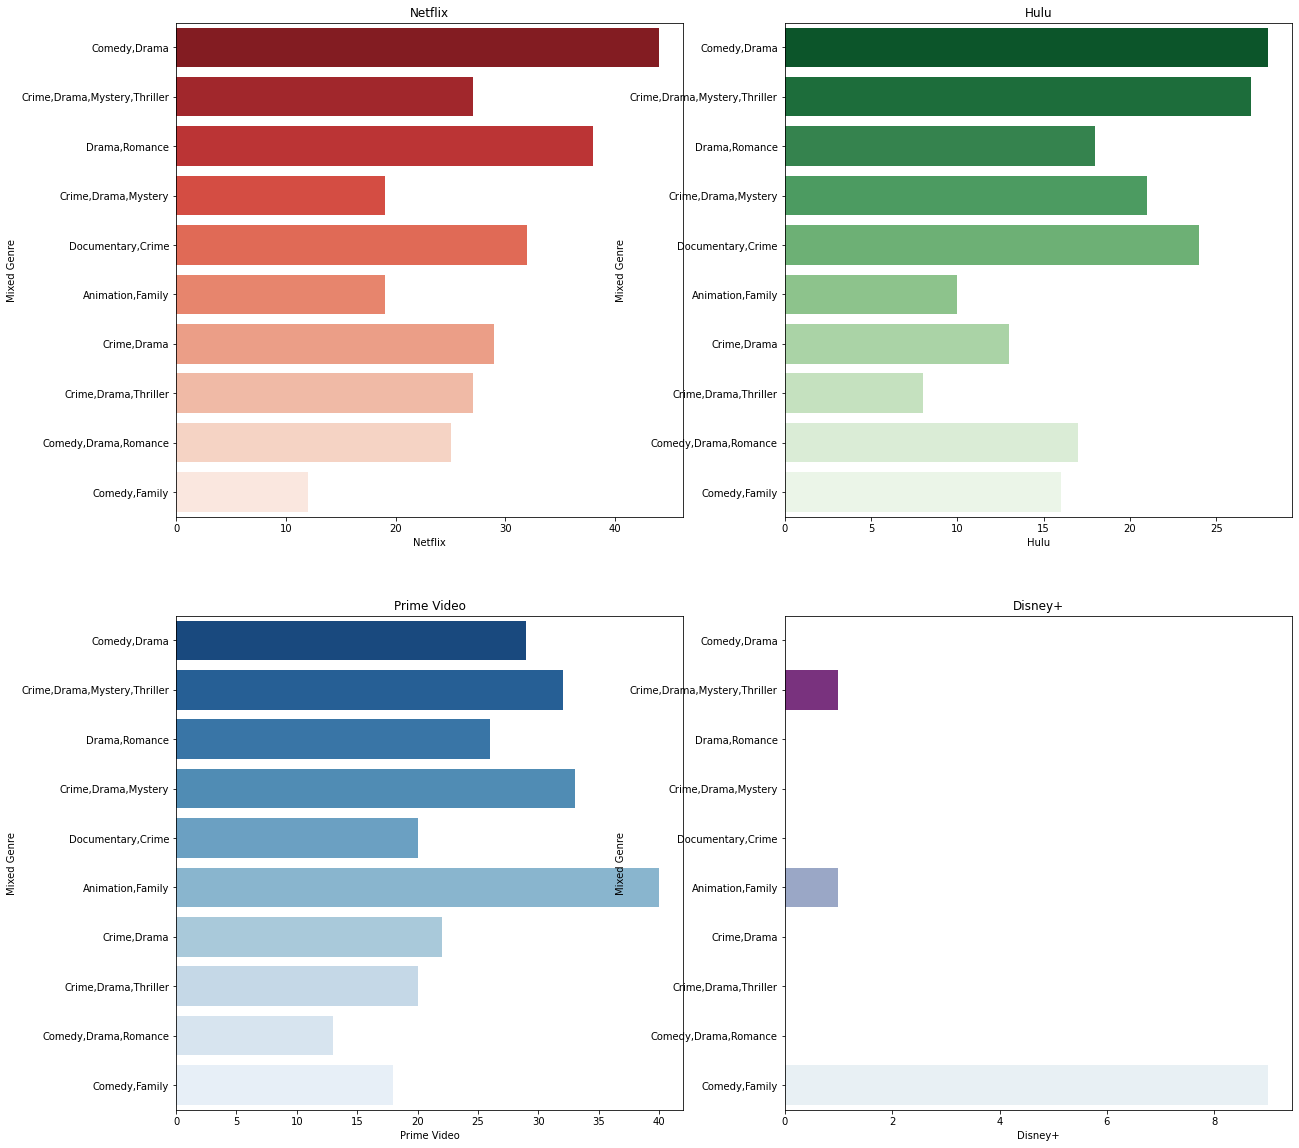

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_g_ax1 = sns.barplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_g_ax2 = sns.barplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_g_ax3 = sns.barplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_g_ax4 = sns.barplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

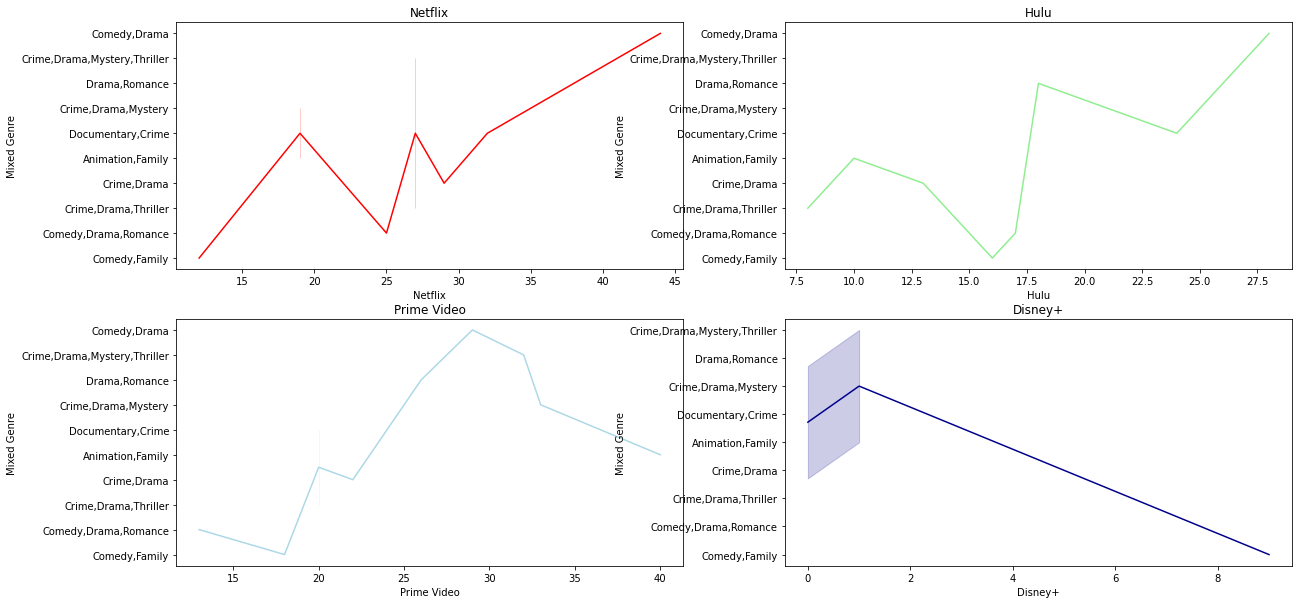

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_mg_ax1 = sns.lineplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_mg_ax2 = sns.lineplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_mg_ax3 = sns.lineplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_mg_ax4 = sns.lineplot(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mg_ax1.title.set_text(labels[0])
h_mg_ax2.title.set_text(labels[1])
p_mg_ax3.title.set_text(labels[2])
d_mg_ax4.title.set_text(labels[3])
 
plt.show()

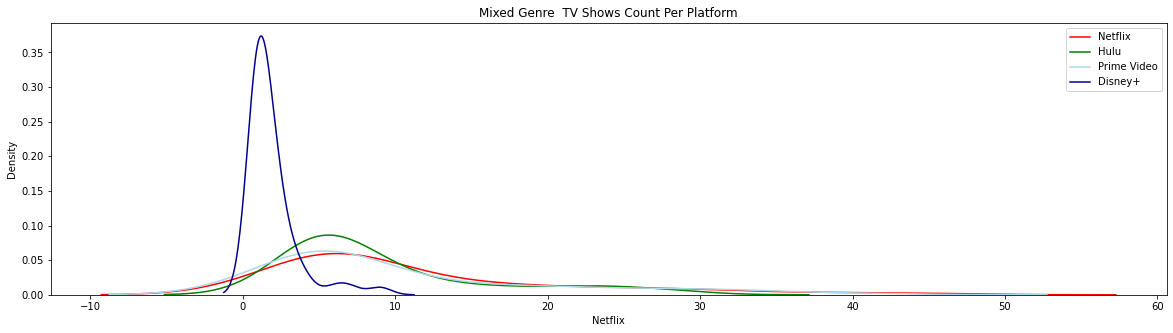

In [104]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Genre  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_genres_tvshows['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_genres_tvshows['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_genres_tvshows['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_genres_tvshows['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

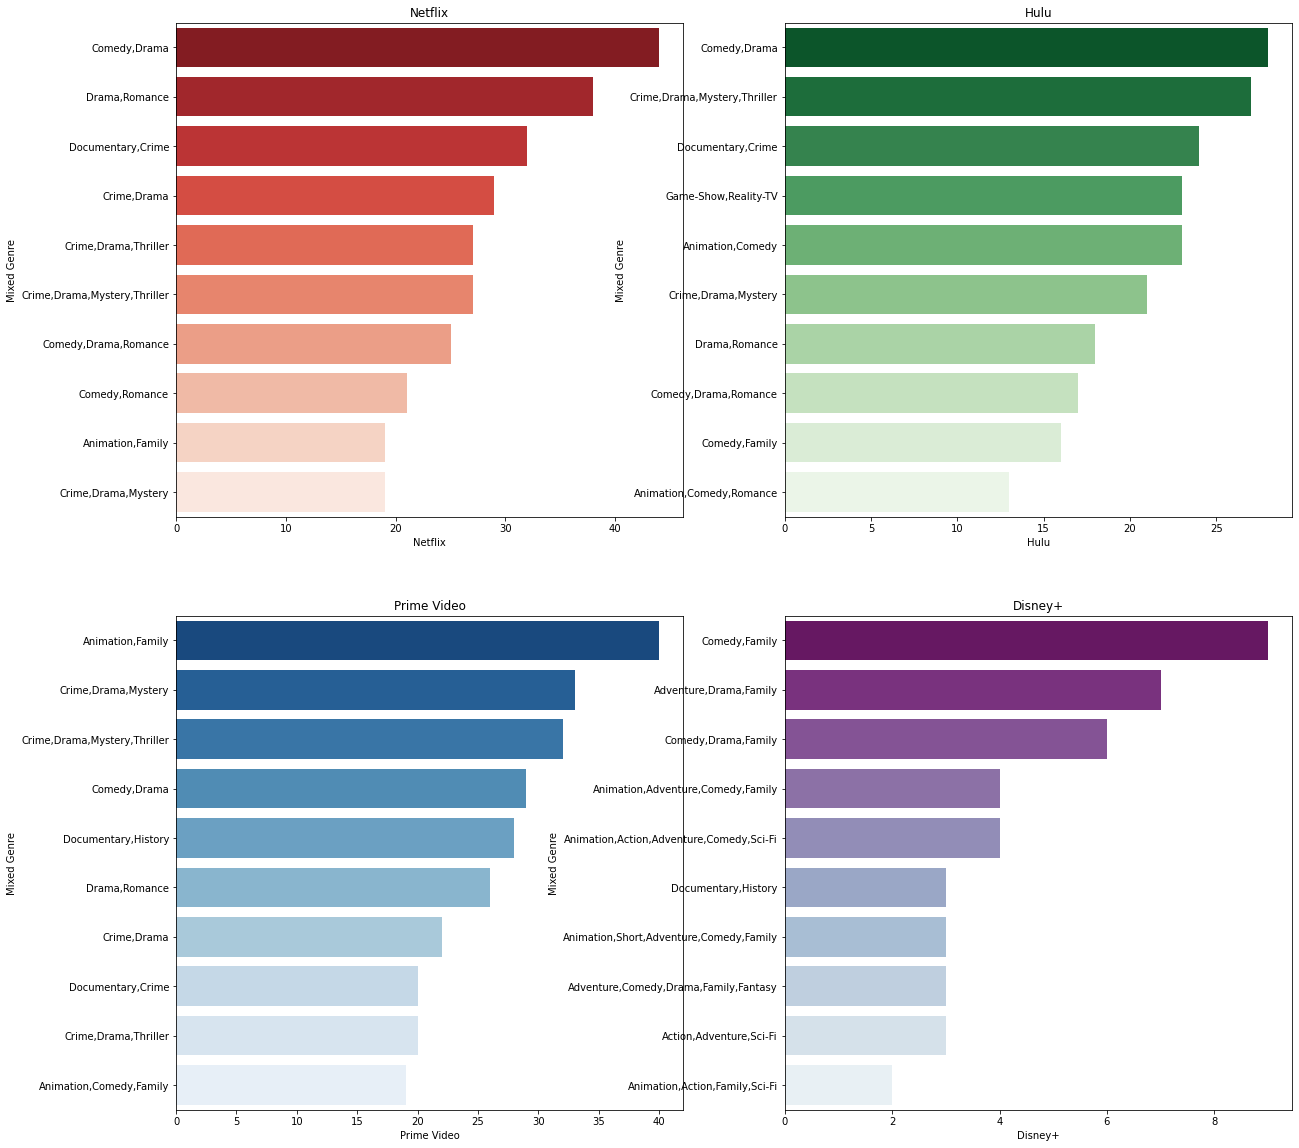

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_mg_ax1 = sns.barplot(y = netflix_mixed_genres_tvshows['Mixed Genre'][:10], x = netflix_mixed_genres_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_mg_ax2 = sns.barplot(y = hulu_mixed_genres_tvshows['Mixed Genre'][:10], x = hulu_mixed_genres_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_mg_ax3 = sns.barplot(y = prime_video_mixed_genres_tvshows['Mixed Genre'][:10], x = prime_video_mixed_genres_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_mg_ax4 = sns.barplot(y = disney_mixed_genres_tvshows['Mixed Genre'][:10], x = disney_mixed_genres_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mg_ax1.title.set_text(labels[0])
h_mg_ax2.title.set_text(labels[1])
p_mg_ax3.title.set_text(labels[2])
d_mg_ax4.title.set_text(labels[3])
 
plt.show()

In [106]:
fig = go.Figure(go.Funnel(y = mixed_genres_data_tvshows['Mixed Genre'][:10], x = mixed_genres_data_tvshows['TV Shows Count'][:10]))
fig.show()

In [126]:
genres = df_tvshows_genre_all['Genres'].str.get_dummies(',')
df_tvshows_genre_all = pd.concat([df_tvshows_genre_all, genres], axis = 1, sort = False)

No of Rows :  5109
No of Coloums :  47
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres         

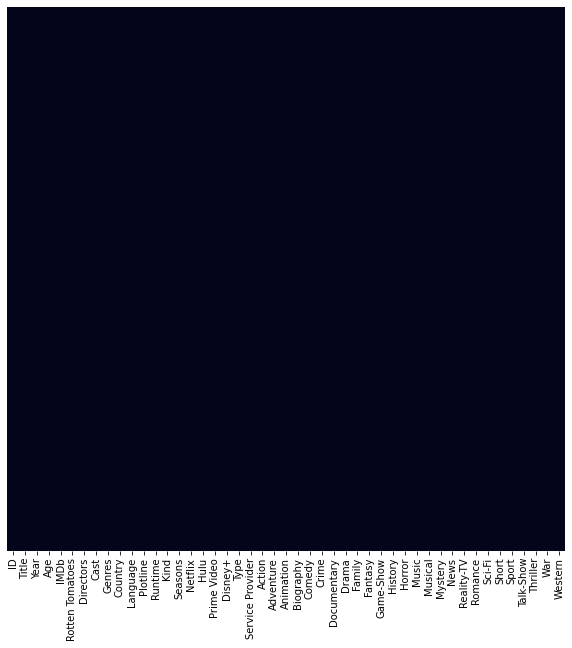

In [127]:
data_investigate(df_tvshows_genre_all)

In [128]:
#Select the features on the basis of ehich you want to cluster
features = df_tvshows_genre_all[['Action', 'Adventure', 'Animation', 'Biography',
                                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                                 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
                                 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
                                 'Thriller', 'War', 'Western']].astype(int)

#Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

#Using TSNE
tsne = TSNE(n_components = 2)
transformed_genre = tsne.fit_transform(scaled_data)

In [130]:
#KMeans - Elbow Method
distortions = []
K = range(1, 100)
for k in K:
    kmean = KMeans(n_clusters = k)
    kmean.fit(scaled_data)
    distortions.append(kmean.inertia_)
fig = px.line(x = K, y = distortions, title = 'The Elbow Method Showing The Optimal K', 
              labels = {'x':'No of Clusters', 'y':'Distortions'})
fig.show()

In [134]:
#Kmeans
cluster = KMeans(n_clusters = 27)
group_pred = cluster.fit_predict(scaled_data)

tsne_df = pd.DataFrame(np.column_stack((transformed_genre, group_pred, df_tvshows_genre_all['Title'], df_tvshows_genre_all['Genres'], df_tvshows_genre_all['Service Provider'])), columns = ['X', 'Y', 'Group', 'Title', 'Genres', 'Service Provider'])

fig = px.scatter(tsne_df, x = 'X', y = 'Y', hover_data = ['Title', 'Genres', 'Service Provider'], color = 'Group', 
                 color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()